In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing as pre
import numpy as np

In [2]:
# load the data
flc = '/Users/pinqingkan/Desktop/DataScience/PythonDataScience/DAT210x-master/Module4/Datasets/'
fname = flc + 'kidney_disease.csv'
X = pd.read_csv(fname, index_col = 0)

In [3]:
# initial process
X = X.dropna(axis = 0)
# create label for X.classification
labels = ['red' if i=='ckd' else 'green' for i in X.classification]

In [4]:
# data slicing
Column_nominal = ['classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
Y = X.drop(Column_nominal, axis = 1)

In [5]:
Y.dtypes

age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv      object
wc       object
rc       object
dtype: object

In [6]:
# convert data type
Z = Y.loc[:, ['pcv','rc', 'wc']].apply(pd.to_numeric, errors = 'coerce')
Y = Y.drop(['pcv','rc', 'wc'], axis = 1)
Y = pd.concat([Y, Z], axis = 1)

In [7]:
Y.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,rc,wc
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342,41.917722,4.891772,8475.949367
std,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204,9.105164,1.019364,3126.880181
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000,9.000000,2.100000,3800.000000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000,37.500000,4.500000,6525.000000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000,44.000000,4.950000,7800.000000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000,48.000000,5.600000,9775.000000
max,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000,54.000000,8.000000,26400.000000


In [8]:
# normalize the data before PCA
Y0 = pre.StandardScaler().fit_transform(Y)
Y0 = pd.DataFrame(Y0, columns = Y.columns)

In [9]:
# PCA on the numerical features
Nfeature = len(Y0.columns.values)
pca = PCA(n_components = Nfeature, svd_solver = 'full')
Y2pca = pca.fit(Y0)
PCA(copy = True, n_components = Nfeature, whiten = False)
Y2 = pca.transform(Y0)

[ 0.47283016  0.09747878  0.08806585  0.06325005  0.06075348  0.0544439
  0.04075951  0.03157992  0.02445793  0.0193426   0.01778336  0.01327498
  0.00986414  0.00611535]


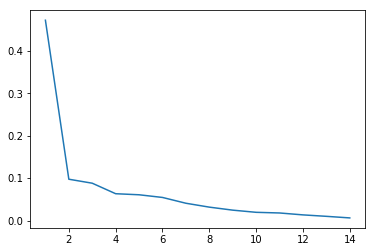

In [10]:
# explore how many PA to keep
print(Y2pca.explained_variance_ratio_)
# scree plot
x_PC = np.arange(1,Nfeature+1,1)
plt.plot(x_PC, Y2pca.explained_variance_ratio_)
plt.show()

In [11]:
# cor between PC and features
corr0 = np.zeros((2,Nfeature))
for j in range(Nfeature):
    for i in range(2):
        aa = Y0.iloc[:,j].as_matrix()
        bb = Y2[:,i]
        corr0[i,j] = np.corrcoef(aa, bb)[0,1]
print(corr0)

[[ 0.32822302  0.39904781 -0.80033538  0.88791971  0.5840551   0.61302234
   0.80770639  0.82974651 -0.66248729  0.24065448 -0.89319458 -0.89707886
  -0.80434279  0.3458476 ]
 [ 0.42012814 -0.2244372  -0.15512474  0.01537084  0.52339205  0.59231354
  -0.35527105 -0.3481242   0.20054008 -0.14578731  0.11111613  0.11073727
   0.05884878  0.38961225]]


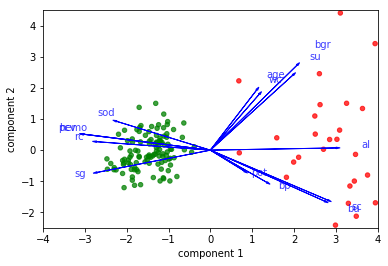

In [12]:
# view the features in 2 PC space

# express the features in terms of PC & estimate the strongest features
x = Y2pca.components_[0] * max(Y2[:,0])
y = Y2pca.components_[1] * max(Y2[:,1])
# plot
ax = plt.axes()
for i in range(Nfeature):
    ax.arrow(0, 0, x[i], y[i], color = 'b', head_width = 0.05, head_length = 0.1)
    plt.text(x[i]*1.2, y[i]*1.2, Y0.columns.values[i], color = 'b', alpha = 0.75)
plt.axis([-4,4,-2.5,4.5])
#plt.axis([0,4,-2.5,0.5])
#plt.axis([-4, -1, -1.5, 2])

# show the transformed samples in the PC frame
Y2plot = pd.DataFrame(Y2[:,0:2])
Y2plot.columns = ['component 1', 'component 2']
Y2plot.plot.scatter(x = 'component 1', y = 'component 2', marker = 'o', c = labels, alpha = 0.75, ax = ax)
plt.show()

In [13]:
# convert the nominal features
Z = X[Column_nominal]
Z = Z.drop(['classification'], axis = 1)
Znum = pd.get_dummies(Z)

In [14]:
Znum.dtypes

rbc_abnormal      uint8
rbc_normal        uint8
pc_abnormal       uint8
pc_normal         uint8
pcc_notpresent    uint8
pcc_present       uint8
ba_notpresent     uint8
ba_present        uint8
htn_no            uint8
htn_yes           uint8
dm_no             uint8
dm_yes            uint8
cad_no            uint8
cad_yes           uint8
appet_good        uint8
appet_poor        uint8
pe_no             uint8
pe_yes            uint8
ane_no            uint8
ane_yes           uint8
dtype: object

In [15]:
# combine with the numerical features
Zall = pd.concat([Y, Znum], axis = 1)

In [16]:
Zall.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,...,0.822785,0.177215,0.930380,0.069620,0.879747,0.120253,0.873418,0.126582,0.898734,0.101266
std,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,...,0.383065,0.383065,0.255315,0.255315,0.326292,0.326292,0.333562,0.333562,0.302640,0.302640
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# normalize the data before PCA
Z0 = pre.StandardScaler().fit_transform(Zall)
Z0 = pd.DataFrame(Z0, columns = Zall.columns)

In [18]:
# PCA on all features
Nfeature = len(Z0.columns.values)
pca = PCA(n_components = Nfeature, svd_solver = 'full')
Z2pca = pca.fit(Z0)
PCA(copy = True, n_components = Nfeature, whiten = False)
Z2 = pca.transform(Z0)

[  4.65481911e-01   8.26940513e-02   6.23025417e-02   5.97571730e-02
   4.67567414e-02   4.11606856e-02   3.03372009e-02   2.89629419e-02
   2.42238797e-02   2.23484065e-02   2.01504089e-02   1.82036166e-02
   1.51209893e-02   1.37789885e-02   1.24780541e-02   1.06508425e-02
   9.67126569e-03   8.22799367e-03   7.48573644e-03   5.81285357e-03
   4.29442531e-03   4.02552940e-03   3.85248878e-03   2.22127451e-03
   3.76274209e-33   3.76274209e-33   3.76274209e-33   3.76274209e-33
   3.76274209e-33   3.76274209e-33   3.76274209e-33   3.76274209e-33
   3.76274209e-33   3.76274209e-33]


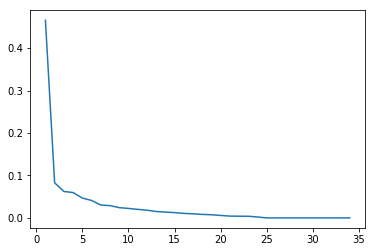

In [19]:
# explore how many PA to keep
print(Z2pca.explained_variance_ratio_)
# scree plot
x_PC = np.arange(1,Nfeature+1,1)
plt.plot(x_PC, Z2pca.explained_variance_ratio_)
plt.show()

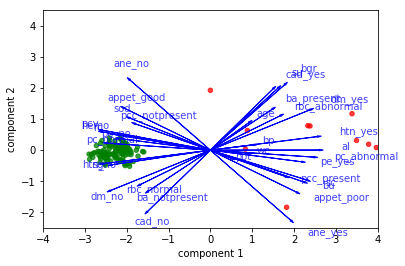

In [26]:
# view the features in 2 PC space

# express the features in terms of PC & estimate the strongest features
x = Z2pca.components_[0] * max(Z2[:,0])
y = Z2pca.components_[1] * max(Z2[:,1])
# plot
ax = plt.axes()
for i in range(Nfeature):
    ax.arrow(0, 0, x[i], y[i], color = 'b', head_width = 0.05, head_length = 0.1)
    plt.text(x[i]*1.2, y[i]*1.2, Z0.columns.values[i], color = 'b', alpha = 0.75)
plt.axis([-4,4,-2.5,4.5])
#plt.axis([0,4,-2.5,0.5])
#plt.axis([-4, -1, -1.5, 2])

# show the transformed samples in the PC frame
Z2plot = pd.DataFrame(Z2[:,0:2])
Z2plot.columns = ['component 1', 'component 2']
Z2plot.plot.scatter(x = 'component 1', y = 'component 2', marker = 'o', c = labels, alpha = 0.75, ax = ax)
plt.show()